In [79]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive_output, interact
import ipywidgets as widgets

In [99]:
def f(x1, y1, x2, y2, x3, y3, radius):
    A = np.array([x3 - x1, y3 - y1])
    B = np.array([x3 - x2, y3 - y2])
    
#     print(np.linalg.norm(B), 2 * radius)
    if np.linalg.norm(B) > 2 * radius:
        print('Does not collide')
        return
    
    theta = 2 * (B @ A)
    psi = B @ B - 4 * radius ** 2
    chi = A @ A

    delta = theta ** 2 - 4 * psi * chi
    try:
        a1 = (-theta + np.sqrt(delta)) / (2 * chi)
        a2 = (-theta - np.sqrt(delta)) / (2 * chi)

        x4_1 = x2 + B[0] + a1 * A[0]
        y4_1 = y2 + B[1] + a1 * A[1]
        x4_2 = x2 + B[0] + a2 * A[0]
        y4_2 = y2 + B[1] + a2 * A[1]
        
        c1 = plt.Circle((x1, y1), radius, color='r', fill=False, label='Walking')
        c2 = plt.Circle((x2, y2), radius, color='g', fill=False, label='Stationary')
        c3 = plt.Circle((x3, y3), radius, color='b', fill=False, linestyle=':', label='Colliding')
        c4_1 = plt.Circle((x4_1, y4_1), radius, color='fuchsia', fill=False, linestyle='--', label='Final 1')
        c4_2 = plt.Circle((x4_2, y4_2), radius, color='darkorange', fill=False, linestyle='--', label='Final 2')

        fig, ax = plt.subplots()
        fig.set_dpi(150)

        ax.set_xlim((-5, 10))
        ax.set_ylim((-5, 10))
        ax.set_aspect('equal', 'box')

        ax.add_patch(c1)
        ax.add_patch(c2)
        ax.add_patch(c3)
        ax.add_patch(c4_1)
        ax.add_patch(c4_2)

        fig.legend()
    except Exception:
        pass

In [85]:
x1, y1 = [5, 5]
x2, y2 = [0, 0]
x3, y3 = [2.5, 2.5]
radius = 3

In [69]:
A = np.array([x3 - x1, y3 - y1])
B = np.array([x3 - x2, y3 - y2])

In [70]:
theta = 2 * (B @ A)
psi = B @ B - 4 * radius ** 2
chi = A @ A

delta = theta ** 2 - 4 * psi * chi

a1 = (-theta + np.sqrt(delta)) / (2 * chi)
a2 = (-theta - np.sqrt(delta)) / (2 * chi)

x4_1 = x2 + B[0] + a1 * A[0]
y4_1 = y2 + B[1] + a1 * A[1]
x4_2 = x2 + B[0] + a2 * A[0]
y4_2 = y2 + B[1] + a2 * A[1]

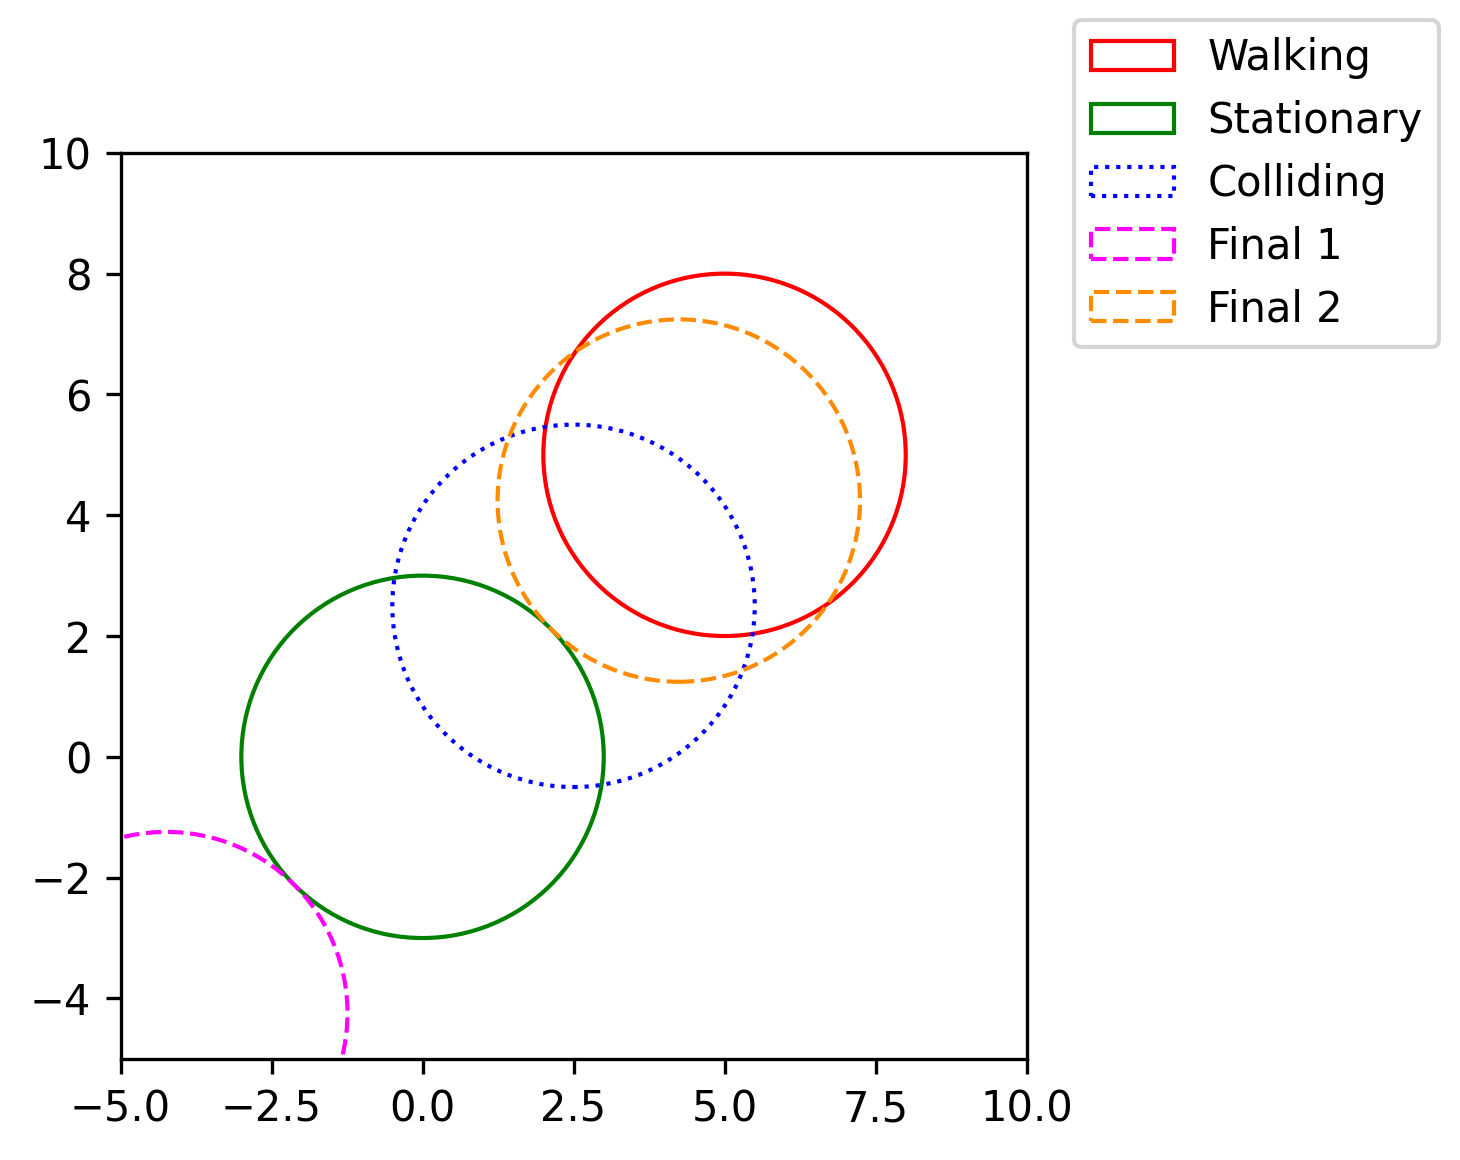

In [71]:
c1 = plt.Circle((x1, y1), radius, color='r', fill=False, label='Walking')
c2 = plt.Circle((x2, y2), radius, color='g', fill=False, label='Stationary')
c3 = plt.Circle((x3, y3), radius, color='b', fill=False, linestyle=':', label='Colliding')
c4_1 = plt.Circle((x4_1, y4_1), radius, color='fuchsia', fill=False, linestyle='--', label='Final 1')
c4_2 = plt.Circle((x4_2, y4_2), radius, color='darkorange', fill=False, linestyle='--', label='Final 2')

fig, ax = plt.subplots()
fig.set_dpi(300)

ax.set_xlim((-5, 10))
ax.set_ylim((-5, 10))
ax.set_aspect('equal', 'box')

ax.add_patch(c1)
ax.add_patch(c2)
ax.add_patch(c3)
ax.add_patch(c4_1)
ax.add_patch(c4_2)

fig.legend()

In [87]:
x1_s = widgets.FloatSlider(min=-5, max=10, step=0.05, value=5, continuous_update=False, description='x1')
y1_s = widgets.FloatSlider(min=-5, max=10, step=0.05, value=5, continuous_update=False, description='y1')
x2_s = widgets.FloatSlider(min=-5, max=10, step=0.05, value=0, continuous_update=False, description='x2')
y2_s = widgets.FloatSlider(min=-5, max=10, step=0.05, value=0, continuous_update=False, description='y2')
x3_s = widgets.FloatSlider(min=-5, max=10, step=0.05, value=2.5, continuous_update=False, description='x3')
y3_s = widgets.FloatSlider(min=-5, max=10, step=0.05, value=2.5, continuous_update=False, description='y3')
radius_s = widgets.FloatSlider(min=0.05, max=10, step=0.05, value=3, continuous_update=False, description='radius')

w1 = widgets.HBox([x1_s, y1_s])
w2 = widgets.HBox([x2_s, y2_s])
w3 = widgets.HBox([x3_s, y3_s])
w4 = widgets.HBox([radius_s])
w5 = widgets.VBox([w1, w2, w3, w4])

In [100]:
out = interactive_output(f, {'x1': x1_s, 'y1': y1_s, 'x2': x2_s, 'y2': y2_s, 'x3': x3_s, 'y3': y3_s, 'radius': radius_s})
display(w5, out)

Output()